In [29]:
# abs((Tau - t) / Tau)  if 0 <= t <= Tau
# 0 - if Tau <= t <= T

import numpy as np

param_T = 2  # период дискретизации в секундах
param_Tau = 0.5 * param_T

high_res = 1024  # количество точек для высокой частоты дискретизации
low_res = 100  # количество точек для низкой частоты дискретизации


def f(t, Tau=param_Tau, T=param_T):  # функция заданная кусочно
    return np.piecewise(
        t,
        [t < 0, (0 <= t) & (t <= Tau), (Tau <= t) & (t <= T), t > T],
        [0, lambda t: abs((Tau - t) / Tau), 0, 0],
    )


def s(t, F_n, F):
    sum = 0
    # delta_t = 1 / F
    for i in range(len(F_n)):
        sum += F_n[i] * np.sinc(F * (t - i * (1 / F)))
    return sum


x_high_res = np.linspace(0, param_T, high_res)  # Высокая частота дискретизации
x_low_res = np.linspace(0, param_T, low_res)  # Низкая частота дискретизации

# print(freq, 1/x_low_res[1])

freq = 1/x_low_res[1]

f_high_res = f(x_high_res)
f_low_res = f(x_low_res)

s_high_res = s(x_high_res, f_low_res, freq)
s_low_res = s(x_low_res, f_low_res, freq)

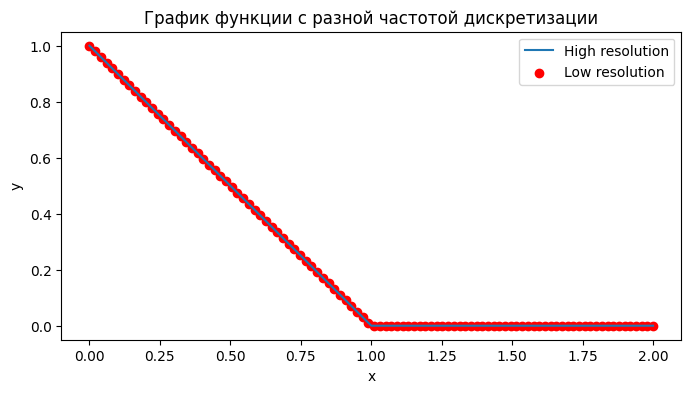

In [30]:
import matplotlib.pyplot as plt

# Строим график для высокой частоты
plt.figure(figsize=(8, 4))
plt.plot(x_high_res, f_high_res, label="High resolution")

# Строим график для низкой частоты
plt.scatter(x_low_res, f_low_res, label="Low resolution", color="red")

# Добавляем легенду
plt.legend()

# Подписи осей и заголовок
plt.xlabel("x")
plt.ylabel("y")
plt.title("График функции с разной частотой дискретизации")

# Показываем график
plt.show()

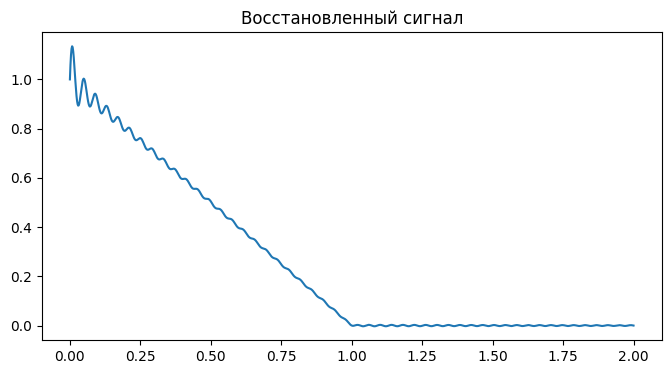

In [31]:
plt.figure(figsize=(8, 4))
plt.plot(x_high_res, s_high_res)
plt.title("Восстановленный сигнал")
plt.show()

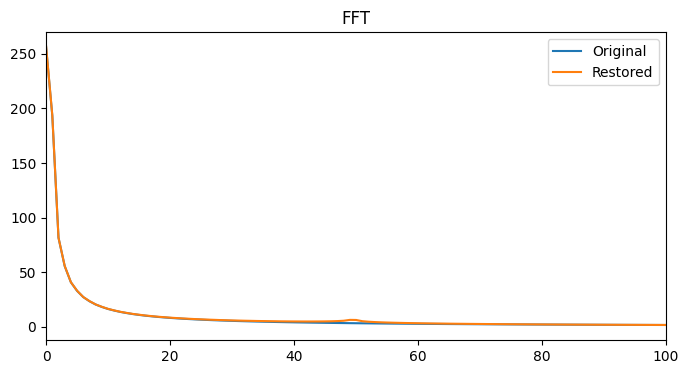

In [33]:
fft_original = np.fft.fft(f_high_res)
fft_values = np.fft.fft(s_high_res)

plt.figure(figsize=(8, 4))
plt.plot(abs(fft_original), label="Original")
plt.plot(abs(fft_values), label="Restored")
plt.title("FFT")
plt.legend()
plt.xlim(0, 100)
plt.show()